In [3]:
import sys
import torch

print("Python:", sys.version)
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
    print("VRAM (GB):", torch.cuda.get_device_properties(0).total_memory / 1e9)


Python: 3.10.17 (main, May 22 2025, 01:53:00) [MSC v.1943 64 bit (AMD64)]
Torch: 2.5.1+cu121
CUDA available: True
GPU: NVIDIA GeForce RTX 4060 Laptop GPU
VRAM (GB): 8.585216


In [12]:
# ================================
# SECTION 3: Project Path & Imports
# ================================

import sys
from pathlib import Path

# Step 1: Detect project root (current working directory)
PROJECT_ROOT = Path.cwd()

print("📂 Project root:", PROJECT_ROOT)

# Step 2: Add project root to Python path
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("✅ Project root added to sys.path")

# Step 3: Test core imports
print("\n🔍 Testing project imports...\n")

try:
    from src.models.mae import MaskedAutoencoder
    print("✅ MaskedAutoencoder imported")
except Exception as e:
    print("❌ MAE import failed:", e)

try:
    from src.models.vit import VisionTransformer
    print("✅ VisionTransformer imported")
except Exception as e:
    print("❌ ViT import failed:", e)

try:
    from src.pipeline import TBDetectionPipeline
    print("✅ TBDetectionPipeline imported")
except Exception as e:
    print("❌ Pipeline import failed:", e)

📂 Project root: c:\Users\Gopi\Downloads\vit
✅ Project root added to sys.path

🔍 Testing project imports...

✅ MaskedAutoencoder imported
✅ VisionTransformer imported
✅ TBDetectionPipeline imported


In [13]:
# =========================================
# SECTION 4: Config Loading & Device Setup
# =========================================

import yaml
import torch
import random
import numpy as np

# Step 1: Load configuration files
with open("configs/mae_config.yaml", "r") as f:
    mae_cfg = yaml.safe_load(f)

with open("configs/vit_config.yaml", "r") as f:
    vit_cfg = yaml.safe_load(f)

print("✅ MAE and ViT configs loaded successfully")

# Step 2: Device selection (do this ONCE)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🖥️ Using device:", DEVICE)

# Step 3: Set random seeds for reproducibility
SEED = mae_cfg.get("seed", 42)

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

print(f"🎯 Random seed set to {SEED}")

# Step 4: Sanity-check important config values
print("\n🔍 MAE CONFIG (key values)")
print("Image size:", mae_cfg["model"]["img_size"])
print("Patch size:", mae_cfg["model"]["patch_size"])
print("Mask ratio:", mae_cfg["model"]["mask_ratio"])
print("Batch size:", mae_cfg["training"]["batch_size"])
print("Epochs:", mae_cfg["training"]["epochs"])

print("\n🔍 ViT CONFIG (key values)")
print("Image size:", vit_cfg["model"]["img_size"])
print("Patch size:", vit_cfg["model"]["patch_size"])
print("Num classes:", vit_cfg["model"]["num_classes"])
print("Batch size:", vit_cfg["training"]["batch_size"])
print("Epochs:", vit_cfg["training"]["epochs"])


✅ MAE and ViT configs loaded successfully
🖥️ Using device: cuda
🎯 Random seed set to 42

🔍 MAE CONFIG (key values)
Image size: 224
Patch size: 16
Mask ratio: 0.75
Batch size: 64
Epochs: 100

🔍 ViT CONFIG (key values)
Image size: 224
Patch size: 16
Num classes: 2
Batch size: 32
Epochs: 50


In [2]:
import pandas as pd

df = pd.read_csv("../data/shenzhen_metadata.csv")
df.tail()

,study_id,sex,age,findings
657,CHNCXR_0658_1.png,Male,41,bilateral secondary PTB with right pneumothorax
658,CHNCXR_0659_1.png,Male,33,secondary PTB in the left upper field
659,CHNCXR_0660_1.png,Male,50,1.bilateral secondary PTB with right upper at...
660,CHNCXR_0661_1.png,Male,26,bilateral secondary PTB with right pleural th...
661,CHNCXR_0662_1.png,Male,32,secondary PTB in the right upper field


In [3]:
df["findings"].value_counts()

findings
normal                                                    326
bilateral PTB                                              61
Right PTB                                                  45
PTB in the right upper field                               27
STB                                                        19
                                                         ... 
left upper PTB, left pleurisy                               1
right PTB,right pneumothorax                                1
right upper field PTB                                       1
right secondary PTB  with bilateral  pleurisy               1
bilateral secondary PTB  with right pleural thickening      1
Name: count, Length: 75, dtype: int64

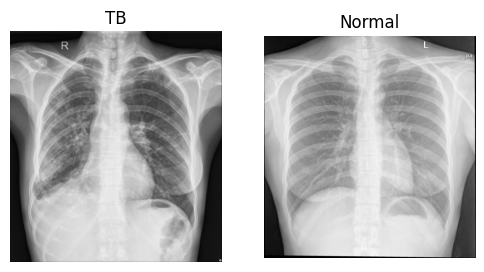

In [10]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random

# dataset paths (use Path objects)
tb_dir = Path(r"C:\Users\Gopi\Downloads\vit\data\Shenzhen\TB")
normal_dir = Path(r"C:\Users\Gopi\Downloads\vit\data\Shenzhen\Normal")

# pick random images
tb_sample = random.choice(list(tb_dir.glob("*.png")))
normal_sample = random.choice(list(normal_dir.glob("*.png")))

# plot
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(Image.open(tb_sample), cmap="gray")
plt.title("TB")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(Image.open(normal_sample), cmap="gray")
plt.title("Normal")
plt.axis("off")

plt.show()
